## Project: Price Sensitivity Analysis for Tech Products — French Online Store

This project focuses on analyzing **sales and pricing data** from a French online tech store.  
The goal is to understand **price sensitivity**, identify **best-selling models**, and uncover **pricing strategies** that maximize revenue.  

### Key objectives:  
- Analyze sales distribution across **price bins**.  
- Evaluate **elasticity of demand** for different products.  
- Provide actionable insights on **optimal pricing ranges** and revenue optimization.  


In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'c:\Users\pc\Desktop\Desk Folders\Data Science\DSAIS 2023-2024\Projects\CertiDeal DS Mission\data\certideal_orders_data_2_years_France.csv')

In [3]:
df.head()

,Unnamed: 0,id_order,Order Detail,Product Name,price,Grade,Date,Customer
0,0,403735,598020,iPhone 8 64 Go Gris sidéral,"128,63 €",Correct,2022-04-30 23:50:36,a5ec0747e94e2e9821ef21dc44a0deff
1,1,403734,598019,iPhone 8 64 Go Gris sidéral,"128,63 €",Correct,2022-04-30 23:49:49,7012ae5374deca856d604023ae7a3a77
2,2,403732,598017,iPhone XR 64 Go Noir,"241,36 €",Correct,2022-04-30 23:42:53,367eee4f3ad73fbc15d5c1858c76c9da
3,3,403731,598015,iPhone 6S Plus 128 Go Gris sidéral,"204,90 €",Parfait état,2022-04-30 23:39:19,47063f7d92240e867f39c96450011148
4,4,403731,598016,Pack Zen (PROMO -10€),"24,90 €",NaN,2022-04-30 23:39:19,47063f7d92240e867f39c96450011148


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487678 entries, 0 to 487677
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_order      487678 non-null  int64 
 1   Order Detail  487678 non-null  int64 
 2   Product Name  487678 non-null  object
 3   price         487678 non-null  object
 4   Grade         282754 non-null  object
 5   Date          487678 non-null  object
 6   Customer      487678 non-null  object
dtypes: int64(2), object(5)
memory usage: 26.0+ MB


In [6]:
display(df)

,id_order,Order Detail,Product Name,price,Grade,Date,Customer
0,403735,598020,iPhone 8 64 Go Gris sidéral,"128,63 €",Correct,2022-04-30 23:50:36,a5ec0747e94e2e9821ef21dc44a0deff
1,403734,598019,iPhone 8 64 Go Gris sidéral,"128,63 €",Correct,2022-04-30 23:49:49,7012ae5374deca856d604023ae7a3a77
2,403732,598017,iPhone XR 64 Go Noir,"241,36 €",Correct,2022-04-30 23:42:53,367eee4f3ad73fbc15d5c1858c76c9da
3,403731,598015,iPhone 6S Plus 128 Go Gris sidéral,"204,90 €",Parfait état,2022-04-30 23:39:19,47063f7d92240e867f39c96450011148
4,403731,598016,Pack Zen (PROMO -10€),"24,90 €",NaN,2022-04-30 23:39:19,47063f7d92240e867f39c96450011148
...,...,...,...,...,...,...,...
487673,684890,1117694,iPhone 11 64 Go Noir,"256,66 €",Correct,2023-09-01 00:10:59,f3cc158058db5cf6f3390b2fa510fcdf
487674,684890,1117695,Batterie neuve,"24,17 €",NaN,2023-09-01 00:10:59,f3cc158058db5cf6f3390b2fa510fcdf
487675,684890,1117696,Pack Zen Plus (OFFERT),"0,00 €",NaN,2023-09-01 00:10:59,f3cc158058db5cf6f3390b2fa510fcdf
487676,684889,1117693,iPhone 11 128 Go Mauve,"314,16 €",Parfait état,2023-09-01 00:05:53,83499ca246bf5c95cbdfded263609abe


In [7]:
print(df['Order Detail'].nunique())

393133


In [8]:
print(df['id_order'].nunique())

224231


In [9]:
df.groupby('Order Detail').size().reset_index(name='count').sort_values(by='count', ascending=False)


,Order Detail,count
196566,812150,2
152625,748497,2
152616,748487,2
152617,748488,2
152618,748489,2
...,...,...
99529,662071,1
99528,662070,1
99527,662069,1
99526,662068,1


In [10]:
# Order Detail column contains duplicate values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393133 entries, 0 to 487677
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_order      393133 non-null  int64 
 1   Order Detail  393133 non-null  int64 
 2   Product Name  393133 non-null  object
 3   price         393133 non-null  object
 4   Grade         228058 non-null  object
 5   Date          393133 non-null  object
 6   Customer      393133 non-null  object
dtypes: int64(2), object(5)
memory usage: 24.0+ MB


In [13]:
df['price'] = df['price'].str.replace(r'[^\d,]', '', regex=True)  

df['price'] = df['price'].str.replace(',', '.').astype(float) 


In [14]:
# Total sales value

sum_sales = df['price'].sum()

print(f'total sales equal to {sum_sales} euros')

total sales equal to 82883737.12 euros


In [15]:
# Average order amount

df1 = df.groupby('id_order')['price'].sum()

display(df1)


id_order
357802    169.80
357803    353.80
357804    147.80
357806    451.90
357808    406.80
           ...  
770930    279.16
770932    440.83
770936    383.24
770937    588.24
770938    518.25
Name: price, Length: 224231, dtype: float64

In [16]:
# all rows in 'price' that are equal to 0 should be dropped

df1 = df1[df1 != 0 ]

In [17]:
# mean sales price 

print(f'mean sales price is {df1.mean()}')

mean sales price is 369.63714543103066


In [18]:
# Average number of items per order

df2 = df.groupby('id_order')['Order Detail'].count()

display(df2)

id_order
357802    2
357803    2
357804    3
357806    1
357808    3
         ..
770930    2
770932    1
770936    2
770937    3
770938    3
Name: Order Detail, Length: 224231, dtype: int64

In [19]:
print(f'average number of items per order: {df2.mean()}')

average number of items per order: 1.753249996655235


In [20]:
# month with highest revenue 

import calendar

df['Date'] = pd.to_datetime(df['Date']) 

df_2023 = df[df['Date'].dt.year == 2023] 

monthly_sales = df_2023.groupby(df_2023['Date'].dt.month)['price'].sum()

# Find best month
best_month = monthly_sales.idxmax()
best_value = monthly_sales.max()
best_month_name = calendar.month_name[best_month]

print(monthly_sales)
print(f"\nBest month in 2023: {best_month_name} with {best_value} euros")


Date
5     3409718.38
6     3324650.89
7     4421839.38
8     4091324.83
9     3352992.34
10    3216960.86
11    6223889.44
12    7428476.87
Name: price, dtype: float64

Best month in 2023: December with 7428476.87 euros


In [21]:
# number of distinct products offered in store

print(f'{df['Product Name'].nunique()} distinct products offered')

1409 distinct products offered


In [22]:
# number of sub-categories

subset = df['Product Name'].str.split().str[0]

print(f'{subset.nunique()} distinct sub-categories')


71 distinct sub-categories


In [23]:
# iPhone products 

subset_iPhone = df[df['Product Name'].str.lower().str.startswith('iphone')]['Product Name'].unique()


import numpy as np

reduced_iPhone = np.array([" ".join(s.split()[:2]) for s in subset_iPhone])

unique_reduced_iPhone = np.unique(reduced_iPhone)

print('distinct iphones in smartphone category:\n')
print(unique_reduced_iPhone)

distinct iphones in smartphone category:

['iPhone 11' 'iPhone 12' 'iPhone 13' 'iPhone 14' 'iPhone 15' 'iPhone 5'
 'iPhone 5C' 'iPhone 5S' 'iPhone 6' 'iPhone 6S' 'iPhone 7' 'iPhone 8'
 'iPhone SE' 'iPhone X' 'iPhone XR' 'iPhone XS' 'iPhone Xr' 'iPhone Xs'
 'iphone 11']


In [24]:
# Samsung smartphone products

subset_Samsung = df[df['Product Name'].str.lower().str.startswith('samsung')]['Product Name'].unique()

reduced_Samsung = np.array([" ".join(s.split()[:4]) for s in subset_Samsung])

unique_reduced_Samsung = np.unique(reduced_Samsung)

print('distinct samsungs in smartphone category:\n')
print(unique_reduced_Samsung)

distinct samsungs in smartphone category:

['Samsung A51 128 go' 'Samsung Galaxy A32 Go' 'Samsung Galaxy A50 64go'
 'Samsung Galaxy A52 128' 'Samsung Galaxy Buds Argent'
 'Samsung Galaxy Buds Blanc' 'Samsung Galaxy Buds Jaune'
 'Samsung Galaxy Buds Noir' 'Samsung Galaxy Buds+ Blanc'
 'Samsung Galaxy Buds+ Bleu' 'Samsung Galaxy Buds+ Noir'
 'Samsung Galaxy Buds+ Rose' 'Samsung Galaxy Buds+ Rouge'
 'Samsung Galaxy J3 16' 'Samsung Galaxy J3 noir' 'Samsung Galaxy Note 10'
 'Samsung Galaxy Note 9' 'Samsung Galaxy S10 128'
 'Samsung Galaxy S10 Bleu' 'Samsung Galaxy S10 Corail'
 'Samsung Galaxy S10 Edge' 'Samsung Galaxy S10 Noir'
 'Samsung Galaxy S10 Plus' 'Samsung Galaxy S10 corail'
 'Samsung Galaxy S10 plus' 'Samsung Galaxy S10e Blanc'
 'Samsung Galaxy S20 128' 'Samsung Galaxy S20 Plus'
 'Samsung Galaxy S21 128' 'Samsung Galaxy S21 Plus'
 'Samsung Galaxy S22 128' 'Samsung Galaxy S22 256' 'Samsung Galaxy S6 32'
 'Samsung Galaxy S7 32' 'Samsung Galaxy S7 Edge' 'Samsung Galaxy S7 edge'
 'Samsu

In [25]:
# identification of categories and sub-categories

counts = subset.value_counts().reset_index()
counts.columns = ['Product Name', 'Count']
print(counts)


   Product Name   Count
0        iPhone  222328
1          Pack   93661
2      Batterie   35010
3      Chargeur    7540
4         Vitre    6177
..          ...     ...
66        Porte       1
67         port       1
68          Mon       1
69   Reparación       1
70         Jean       1

[71 rows x 2 columns]


In [26]:
display(subset)

0           iPhone
1           iPhone
2           iPhone
3           iPhone
4             Pack
            ...   
487673      iPhone
487674    Batterie
487675        Pack
487676      iPhone
487677      iPhone
Name: Product Name, Length: 393133, dtype: object

In [27]:
# keyword category mapping with priority

keyword_priority = [
('Batterie', 'Accessories'),
 ('Chargeur','Accessories'),
 ('Vitre','Accessories'),
 ('Housse','Accessories'),
 ('Clip','Accessories'),
 ('Cable','Accessories'),
 ('Câble','Accessories'),
 ('Coque','Accessories'),
 ('Ecran','Accessories'),
 ('Prise','Accessories'),
 ('Écran','Accessories'),
 ('e-Carte','Accessories'),
 ('Tag','Accessories'),
 ('Caméra','Accessories'),
 ('écran','Accessories'),
 ('Anneau','Accessories'),
 ('châssis','Accessories'),
 ('chassis','Accessories'),
 ('ecran','Accessories'),
 ('Airpods','Headphones and Speakers'),
 ('Buds','Headphones and Speakers'),
 ('Écouteurs','Headphones and Speakers'),
 ('Ecouteurs','Headphones and Speakers'),
 ('Mini-Enceinte','Headphones and Speakers'),
 ('enceinte','Headphones and Speakers'),
 ('iphone','smartphone'),
 ('samsung','smartphone'),
 ('pack','promotion'),
 ('option','promotion'),
 ('lien','promotion'),
 ('certiprime','promotion'),
 ('porte','promotion'),
 ('mon','promotion'),
 ('garantie','insurance'),
 ('extension','insurance'),
 ('assurance','insurance'),
 ('caution','insurance'),
 ('ipad','tablet'),
 ('Mac','laptop'),
 ('tv','streaming device'),
 ('watch','smart watch'),
 ('reparation','service'),
 ('support','service'),
 ('Réparation','service'),
 ('frais','service'),
 ('upgrade','service'),
 ('Désoxydation','service'),
 ('Reparación','service'),
 ('colis','other'),
 ('commande','other'),
 ('slot','other'),
 ('Alphadepanordi','other'),
 ('regule','other'),
 ('Complément','other'),
 ('Conmigo','other'),
 ('Alex','other'),
 ('9','other'),
 ('wth','other'),
 ('12','other'),
 ('3','other'),
 ('bouton','other'),
 ('cambio','other'),
 ('port','other'),
 ('jean','other'),

 ]

In [28]:
# Adding category column to dataframe

def assign_category(product_name):
    for keyword, category in keyword_priority:  #
        if keyword.lower() in product_name.lower():
            return category
    return "other"

df["Category"] = df["Product Name"].apply(assign_category) 

print(df)

        id_order  Order Detail                         Product Name   price  \
0         403735        598020          iPhone 8 64 Go Gris sidéral  128.63   
1         403734        598019          iPhone 8 64 Go Gris sidéral  128.63   
2         403732        598017                iPhone XR 64 Go Noir   241.36   
3         403731        598015  iPhone 6S Plus 128 Go Gris sidéral   204.90   
4         403731        598016                Pack Zen (PROMO -10€)   24.90   
...          ...           ...                                  ...     ...   
487673    684890       1117694                iPhone 11 64 Go Noir   256.66   
487674    684890       1117695                       Batterie neuve   24.17   
487675    684890       1117696               Pack Zen Plus (OFFERT)    0.00   
487676    684889       1117693              iPhone 11 128 Go Mauve   314.16   
487677    684888       1117692           iPhone 12 mini 128 Go Vert  294.16   

               Grade                Date           

In [29]:
category_counts = df.groupby("Category")["Product Name"].nunique().reset_index(name="Unique Product Count").sort_values(by="Unique Product Count", ascending=False)
print(category_counts)


                   Category  Unique Product Count
8                smartphone                   916
10                   tablet                   175
0               Accessories                   134
5                 promotion                    84
1   Headphones and Speakers                    36
4                     other                    24
2                 insurance                    11
7               smart watch                    10
9          streaming device                     9
6                   service                     8
3                    laptop                     2


In [30]:
# sales per category

sales_per_category = df.groupby('Category')['price'].sum().sort_values(ascending=False)
print(sales_per_category)

Category
smartphone                 78649251.38
promotion                   2297272.74
Accessories                 1327802.16
tablet                       231818.29
Headphones and Speakers      210351.88
other                         65198.64
insurance                     55254.87
service                       21909.76
laptop                        12461.00
smart watch                    8304.57
streaming device               4111.83
Name: price, dtype: float64


In [31]:
# ranking of smartphone sales

smartphone_sales = (
    df[df["Category"] == "smartphone"]       
      .groupby("Product Name")["price"]      
      .agg(Total_Sales="sum", Count="count")
      .sort_values(by='Total_Sales',ascending=False)
      .reset_index()
)

print(f'{smartphone_sales}\n')
print(f'best selling smartphone is the {smartphone_sales.iloc[0, 0]}')


                                          Product Name  Total_Sales  Count
0                                iPhone 11 64 Go Noir    4539025.38  12706
1                               iPhone 11 128 Go Noir    2088060.58   5087
2                                iPhone 12 128 Go Bleu   2045238.67   4457
3                                 iPhone 12 64 Go Bleu   1965857.18   4735
4                                 iPhone 12 64 Go Noir   1927614.56   4462
..                                                 ...          ...    ...
911  iPhone SE 2016 32 Go - Correct - Bouton Home H...        77.50      1
912  iPhone 6S 16 Go - Correct - Bouton Home HS (Co...        74.17      1
913           iPhone 6 16go Bon état (offre solidaire)        50.00      1
914                              iPhone 5C 8 Go Blanc         34.90      1
915        Lien de paiement Easy Deal - envoi iPhone X         1.00      1

[916 rows x 3 columns]

best selling smartphone is the iPhone 11 64 Go Noir 


In [32]:
# number of unique customers in 2023

print(f' online store served {df_2023['Customer'].nunique()} unique customers')

 online store served 83831 unique customers


In [33]:
# largest customer

largest_customer = df_2023.groupby('Customer')['price'].sum().sort_values(ascending=False)

display(largest_customer)
print()
print(f'ID corresponding to the largest customer is {largest_customer.index[0]}')

Customer
498159634ea71c4d17c307065a510870    587353.35
613b0b5e5ae52b51c29b7b8847f3cbd1     27664.43
a5d68a006a7edd0eac4a204d046498a7     17094.99
1b96d815f4550b763bae70de4b06d242     15387.95
f91fc4606a37e55e1392e98c5e1e755b     13549.55
                                      ...    
ff72bee2bbc6d1b20f8728e4878114dc         0.83
f642c7911d0628b60fce1cec351e30bc         0.83
b79eef9a3e9b294b979d47b2cede87d3         0.83
2f54300d4ea8c544246433629579e445         0.83
8e461310a45e21409baf03119a51e9c1         0.83
Name: price, Length: 83831, dtype: float64


ID corresponding to the largest customer is 498159634ea71c4d17c307065a510870


In [34]:
print(f'number of unique grades in Grade column is {df[df['Category'] == 'smartphone']['Grade'].nunique()}')

number of unique grades in Grade column is 6


In [35]:
# grades per category table

unique_grades_per_category = df.groupby("Category")["Grade"].nunique().sort_values(ascending=False).reset_index(name="Unique_Grades per category")
print(unique_grades_per_category)


                   Category  Unique_Grades per category
0                smartphone                           6
1   Headphones and Speakers                           3
2                    tablet                           3
3               Accessories                           2
4                    laptop                           2
5                     other                           2
6                 promotion                           2
7               smart watch                           2
8          streaming device                           2
9                 insurance                           0
10                  service                           0


In [36]:
unique_grades = df['Grade'].unique()
print(f'list of unique grades: {unique_grades}')

list of unique grades: ['Correct' 'Parfait état' nan 'Premium' 'Très bon état' 'Neuf'
 'Reconditionné']


In [37]:
iphone11_grades = df.loc[df['Product Name']=='iPhone 11 64 Go Noir ','Grade'].unique()
print(f'list of unique grades for best-selling iPhone 11: {iphone11_grades}')

list of unique grades for best-selling iPhone 11: ['Premium' 'Parfait état' 'Correct' 'Très bon état' 'Neuf']


In [38]:
# mean price of best-selling smartphone of the highest grade

subset_neuf = df[(df['Product Name'] == 'iPhone 11 64 Go Noir ') & (df['Grade'] == 'Neuf')]
mean_subset_neuf = subset_neuf['price'].mean()
print(f'mean price of neuf grade best-selling iphone 11 is {mean_subset_neuf} euros')

mean price of neuf grade best-selling iphone 11 is 640.83 euros


In [39]:
# mean price of best-selling smartphone of lowest grade

subset_correct = df[(df['Product Name'] == 'iPhone 11 64 Go Noir ') & (df['Grade'] == 'Correct')]
mean_subset_correct = subset_correct['price'].mean()
print(f'mean price of correct grade best-selling iphone 11 is {mean_subset_correct} euros')

mean price of correct grade best-selling iphone 11 is 344.0666228693181 euros


In [40]:
# price difference between the highest grade and lowest grade in best-selling iphone 11 64 go Noir

print(f'price difference b/w highest and lowest grade iphone 11 is {mean_subset_neuf - mean_subset_correct} euros')

price difference b/w highest and lowest grade iphone 11 is 296.76337713068193 euros


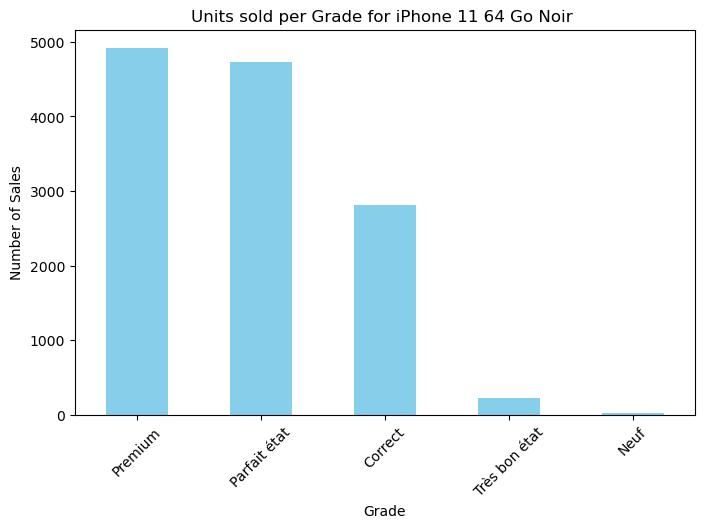

In [41]:
# Units sold per grade bar chart of best-selling iPhone 11

model_df = df[df['Product Name'] == 'iPhone 11 64 Go Noir ']

import matplotlib.pyplot as plt

best_model = 'iPhone 11 64 Go Noir '

# units sold per grade
grade_counts = model_df['Grade'].value_counts()

# Plot
plt.figure(figsize=(8,5))
grade_counts.plot(kind='bar', color='skyblue')
plt.title(f'Units sold per Grade for {best_model}')
plt.xlabel('Grade')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()



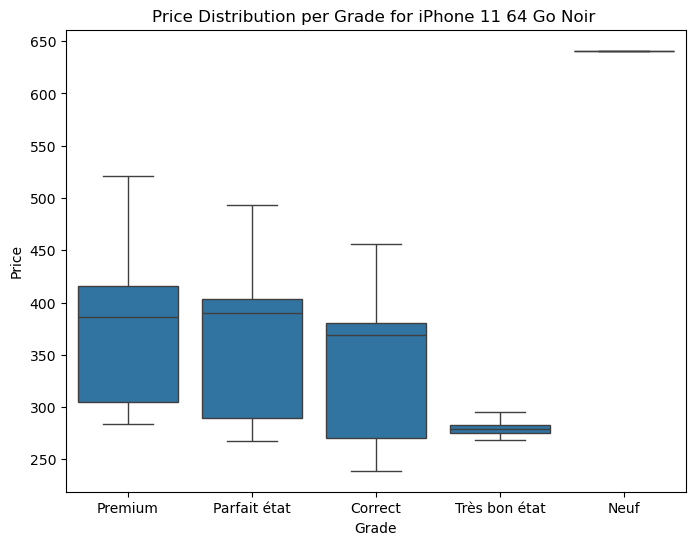

In [42]:
# Price Distribution per Grade for best-selling iPhone 11

import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Grade', y='price', data=model_df)
plt.title(f'Price Distribution per Grade for {best_model}')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [43]:
# Price Sensitivity Analysis for best-selling iPhone

def price_sensitivity(df, product_name, bin_width=50, plot=True):
    """
    Perform price sensitivity analysis for a given product.
    Handles Categorical bins safely and computes elasticity.

    Parameters:
    - df: pandas DataFrame with at least ['Product Name', 'price'] columns
    - product_name: str, product to analyze
    - bin_width: int, width of price bins
    - plot: bool, whether to plot histogram + cumulative sales

    Returns:
    - price_sales: DataFrame with Price_Bin, Sales_Count, Cumulative_Sales, Price_Mid, Elasticity
    """
    # Filter product
    model_df = df[df['Product Name'].str.strip() == product_name.strip()].copy()
    if model_df.empty:
        print(f"No data found for product '{product_name}'")
        return None

    # Bin prices
    min_price = model_df['price'].min()
    max_price = model_df['price'].max()
    bins = range(int(min_price), int(max_price) + bin_width, bin_width)
    model_df['Price_Bin'] = pd.cut(model_df['price'], bins, ordered=True)

    # Aggregate sales per bin
    price_sales = model_df.groupby('Price_Bin', observed=True).size().reset_index(name='Sales_Count')

    # Convert Price_Bin to numeric midpoint
    price_sales['Price_Mid'] = price_sales['Price_Bin'].apply(lambda x: x.mid if pd.notnull(x) else None)
    price_sales['Price_Mid'] = pd.to_numeric(price_sales['Price_Mid'], errors='coerce')

    # Drop rows with NaN Price_Mid (empty bins)
    price_sales = price_sales.dropna(subset=['Price_Mid']).reset_index(drop=True)

    # Cumulative sales
    price_sales['Cumulative_Sales'] = price_sales['Sales_Count'].cumsum()

    # Price elasticity
    price_sales['Sales_Pct_Change'] = price_sales['Sales_Count'].pct_change()
    price_sales['Price_Pct_Change'] = price_sales['Price_Mid'].pct_change()
    price_sales['Elasticity'] = price_sales['Sales_Pct_Change'] / price_sales['Price_Pct_Change']

    # Plot
    if plot:
        plt.figure(figsize=(10,6))
        plt.bar(price_sales['Price_Bin'].astype(str), price_sales['Sales_Count'], color='skyblue', label='Sales per Bin')
        plt.plot(price_sales['Price_Bin'].astype(str), price_sales['Cumulative_Sales'], color='red', marker='o', label='Cumulative Sales')
        plt.xticks(rotation=45)
        plt.xlabel('Price Range')
        plt.ylabel('Number of Sales')
        plt.title(f'Price Sensitivity for {product_name}')
        plt.legend()
        plt.show()

    return price_sales


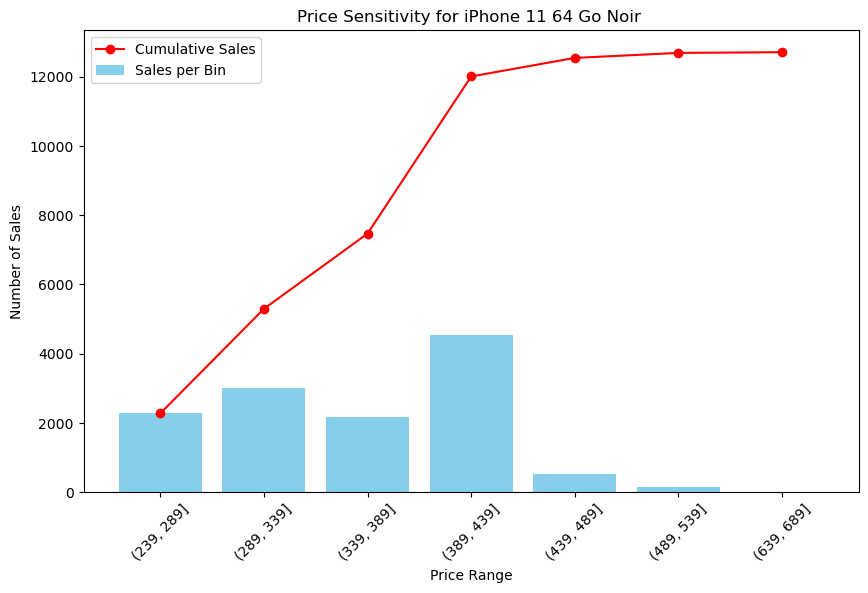

    Price_Bin  Sales_Count  Price_Mid  Cumulative_Sales  Sales_Pct_Change  \
0  (239, 289]         2277      264.0              2277               NaN   
1  (289, 339]         3018      314.0              5295          0.325428   
2  (339, 389]         2173      364.0              7468         -0.279987   
3  (389, 439]         4537      414.0             12005          1.087897   
4  (439, 489]          536      464.0             12541         -0.881860   
5  (489, 539]          145      514.0             12686         -0.729478   
6  (639, 689]           20      664.0             12706         -0.862069   

   Price_Pct_Change  Elasticity  
0               NaN         NaN  
1          0.189394    1.718261  
2          0.159236   -1.758317  
3          0.137363    7.919890  
4          0.120773   -7.301803  
5          0.107759   -6.769552  
6          0.291829   -2.954023  


In [44]:
result = price_sensitivity(df, "iPhone 11 64 Go Noir ", bin_width=50)
print(result)


# 📊 Price Sensitivity Analysis — Insights  

## 1️⃣ Bin (239, 289]  
- **Sales_Count:** 2277  
- **Price_Mid:** 264  
- **Cumulative_Sales:** 2277  
- **Elasticity:** N/A (first bin)  

**Insight:**  
This is the lowest price bin, with solid sales. No elasticity yet, but it sets the baseline for sales behavior as price increases.  

---

## 2️⃣ Bin (289, 339]  
- **Sales_Count:** 3018 → **↑ 32.5% vs previous bin**  
- **Price_Mid:** 314  
- **Elasticity:** 1.72  

**Insight:**  
Moderate price increase leads to **more sales**, suggesting the product may be perceived as higher value or more desirable at this price.  
Elasticity > 1 → sales are price sensitive, but in this case, sales actually **increased with price** (possibly due to anomalies or promotions).  

---

## 3️⃣ Bin (339, 389]  
- **Sales_Count:** 2173 → **↓ ~28%**  
- **Price_Mid:** 364  
- **Elasticity:** -1.76  

**Insight:**  
Higher price reduces sales significantly.  
Negative elasticity indicates a **normal price-sensitive behavior** (sales drop as price rises).  

---

## 4️⃣ Bin (389, 439]  
- **Sales_Count:** 4537 → **↑ 108%**  
- **Price_Mid:** 414  
- **Elasticity:** 7.92  

**Insight:**  
Surprisingly high sales despite higher price.  
Could indicate **promotions, bundles, or special events**.  
Elasticity is extremely high → small price changes cause **huge swings in sales**.  

---

## 5️⃣ Bin (439, 489]  
- **Sales_Count:** 536 → **↓ ~88%**  
- **Price_Mid:** 464  
- **Elasticity:** -7.3  

**Insight:**  
At this high price, most customers avoid the product.  
Negative elasticity confirms that higher prices **strongly reduce demand**.  

---

## 6️⃣ Bin (489, 539]  
- **Sales_Count:** 145 → **very low**  
- **Price_Mid:** 514  
- **Elasticity:** -6.77  

**Insight:**  
Extremely price-sensitive region.  
Only a small segment of customers are willing to pay this much.  

---

## 7️⃣ Bin (639, 689]  
- **Sales_Count:** 20 → **negligible**  
- **Price_Mid:** 664  
- **Elasticity:** -2.95  

**Insight:**  
Very high price → almost no demand.  
At this range, the product is essentially **out of the market**.  

---

# 🔹 Key Takeaways  

### ✅ Optimal Price Range  
- **(289, 339] and (389, 439]** → highest sales volume at moderate-to-high price.  
- Bin **(389, 439]** seems anomalous → may have been influenced by **promotions or bulk purchases**.  

### ⚖️ Revenue vs Pricing  
- Low-price bins sell well but may leave **revenue on the table**.  
- High-price bins (439€+) are **too sensitive**, with few sales and negative elasticity.  

### 💡 Pricing Strategy  
- Focus on bins with **high sales and moderate elasticity** → maximize revenue.  
- Avoid bins above **439€**, unless targeting **premium buyers**.  

### 📉 Elasticity Analysis  
- Large swings in elasticity suggest **unstable demand**.  
- Likely influenced by **promotions, stock limitations, or external factors**.  
